# In this project I will use TF to attempt to classify benign/ malignant tumours

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\Serg\\Refactored_Py_DS_ML_Bootcamp-master'

In [3]:
#changing directory to find the dataset 

os.chdir("C:\\Users\\Serg\\Refactored_Py_DS_ML_Bootcamp-master\\TensorFlow_FILES\\TensorFlow_FILES\\DATA")

#listing all files in the directory

os.listdir()

['.ipynb_checkpoints',
 'advanced_housing.csv',
 'african_econ_crises.csv',
 'bank-additional-full.csv',
 'bank-additional-names.txt',
 'bank.csv',
 'boxplot.png',
 'california_housing_sklearn.csv',
 'cancer_classification.csv',
 'diamonds.csv',
 'ECOMPCTNSA.csv',
 'example.csv',
 'Excel_Sample.xlsx',
 'fake_reg.csv',
 'flights.csv',
 'Frozen_Dessert_Production.csv',
 'german_credit_data.csv',
 'heart.csv',
 'iris.csv',
 'kc_house_data.csv',
 'LCDataDictionary.xlsx',
 'lending_club_info.csv',
 'lending_club_loan_two.csv',
 'melb_data.csv',
 'RSCCASN.csv',
 'stroke_data.csv',
 'stroke_features.png',
 'Universities.csv']

In [4]:
df = pd.read_csv("cancer_classification.csv")

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

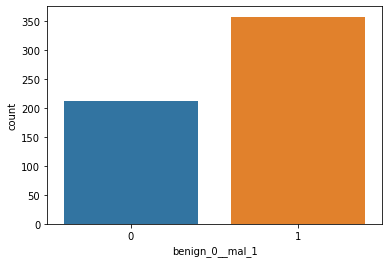

In [9]:
#visualizing the destribution 
sns.countplot(x = "benign_0__mal_1",data = df)

<AxesSubplot:>

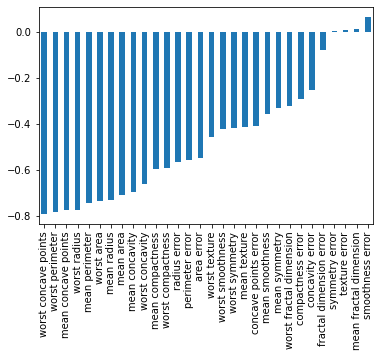

In [15]:
#checking for correlation,excluding the target column
df.corr()["benign_0__mal_1"][:-1].sort_values().plot(kind = "bar")

Seems like there is a lot of strongly negative correlated features, so should be able to get a strong prediction

In [19]:
X = df.drop("benign_0__mal_1",axis = 1).values
y = df["benign_0__mal_1"].values

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_test = scaler.transform(X_test)

In [27]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [29]:
X_train.shape

(426, 30)

In [30]:
model = Sequential()

model.add(Dense(30,activation = "relu"))
model.add(Dense(15,activation = "relu"))
model.add(Dense(1,activation = "sigmoid")) # for binary classification last layer has to be sigmoid

model.compile(loss = "binary_crossentropy",optimizer = "adam")

In [31]:
model.fit(x = X_train,y=y_train,epochs = 600, validation_data = (X_test,y_test),verbose = 0)

In [32]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

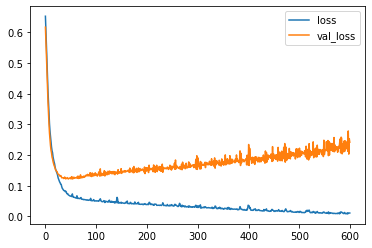

In [33]:
losses.plot()

Perfect example of overfitting. Validation loss is beginning to increase, indication that our data is being overfitted. Need to use early stopping

In [43]:
model = Sequential()

model.add(Dense(30,activation = "relu"))
model.add(Dense(15,activation = "relu"))
model.add(Dense(1,activation = "sigmoid")) # for binary classification last layer has to be sigmoid

model.compile(loss = "binary_crossentropy",optimizer = "adam")

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
#monitoring validation loss and stopping at the point where loss hits the minimum
early_stop = EarlyStopping(monitor = "val_loss", mode = "min",verbose = 1, patience = 25)

In [46]:
model.fit(x = X_train,y=y_train,epochs = 600, validation_data = (X_test,y_test),verbose = 0,callbacks = [early_stop])

Epoch 00075: early stopping


In [47]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

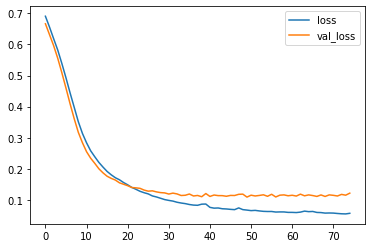

In [48]:
model_loss.plot()

Model is now dealing with overfitting, as can be seen from the flattening  val_loss line.

In [49]:
from tensorflow.keras.layers import Dropout

In [52]:
model = Sequential()

model.add(Dense(30,activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(15,activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation = "sigmoid")) # for binary classification last layer has to be sigmoid

model.compile(loss = "binary_crossentropy",optimizer = "adam")

In [53]:
model.fit(x = X_train,y=y_train,epochs = 600, validation_data = (X_test,y_test),verbose = 0,callbacks = [early_stop])

Epoch 00165: early stopping


In [54]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

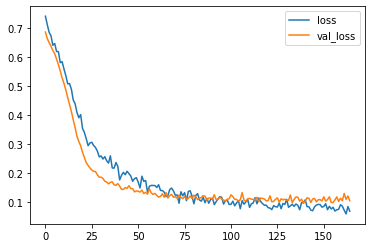

In [55]:
model_loss.plot()

In [63]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

Importing evaluation functions

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [66]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 4 84]]
